In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

import prepare as pr 


# acquire

In [2]:
df = pd.read_csv('store.csv')

In [3]:
sdf = df.sample(100000)

In [4]:
sdf = pr.convert_to_datetime(df)

In [5]:
sdf.head(1)

,item_id,sale_id,sale_date,store_id,sale_amount,item_brand,item_name,item_price,store_zipcode,store_state
0,1,1,2013-01-01,1,13,Riceland,Riceland American Jazmine Rice,0.84,78231,TX


In [6]:
df = pr.add_feats(sdf)

# split

In [7]:
# grabbing everything before and including 2016
train = df[:'2016']
# grab 2017
test = df['2017']

In [8]:
test.head(1)

,item_id,sale_id,store_id,sale_amount,item_brand,item_name,item_price,store_zipcode,store_state,month,dow,sales_total
sale_date,,,,,,,,,,,,
2017-01-01,1,1462,1,19,Riceland,Riceland American Jazmine Rice,0.84,78231,TX,Jan,Sun,15.96


In [9]:
print('Date Range:', train.index.min(), 'to', train.index.max())
print('Shape:', train.shape)


Date Range: 2013-01-01 00:00:00 to 2016-12-31 00:00:00
Shape: (7305000, 12)


In [10]:
print('Date Range:', test.index.min(), 'to', test.index.max())
print('Shape:', test.shape)


Date Range: 2017-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (1825000, 12)


# visualize the split

<AxesSubplot:xlabel='sale_date'>

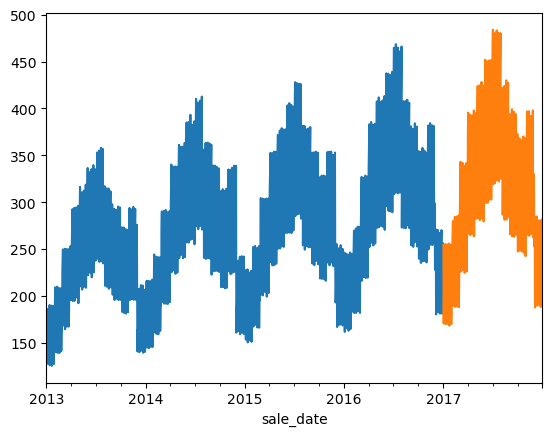

In [11]:
train.resample('d').sales_total.mean().plot()
test.resample('d').sales_total.mean().plot()

# visuals


In [12]:
y = train.sales_total

<AxesSubplot:ylabel='Frequency'>

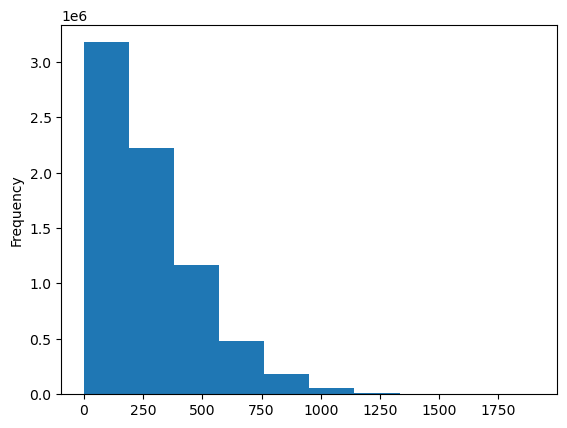

In [13]:
y.plot.hist()

[Text(0.5, 1.0, 'Average sales by Week'),
 Text(0.5, 0, 'Week'),
 Text(0, 0.5, 'sales total')]

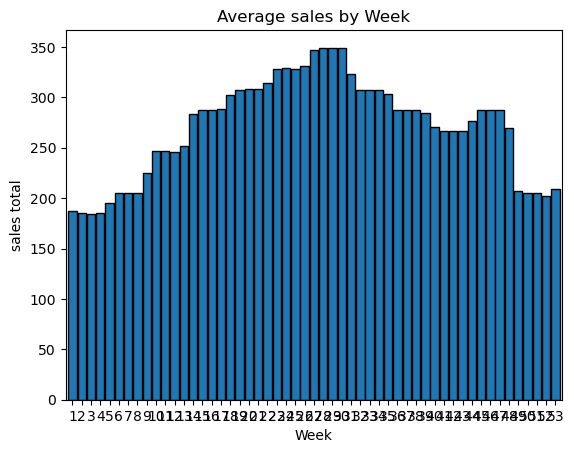

In [14]:
ax = y.groupby(y.index.week).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average sales by Week', xlabel='Week', ylabel='sales total')

[Text(0.5, 1.0, 'average sales by month'),
 Text(0.5, 0, 'month'),
 Text(0, 0.5, 'sales total')]

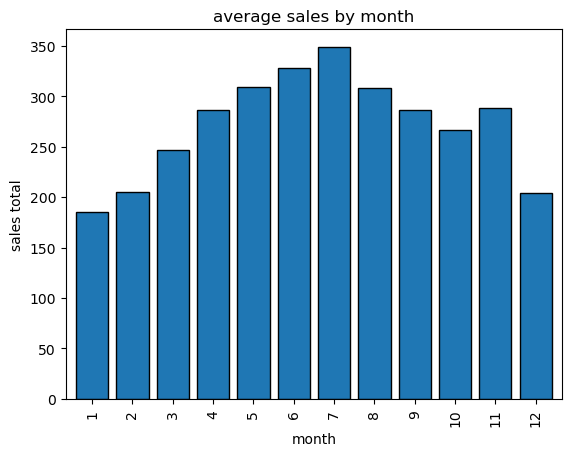

In [15]:
ax = y.groupby(y.index.month).mean().plot.bar(width = .8, ec = 'black')
ax.set(title= "average sales by month", xlabel = 'month',ylabel = 'sales total')

In [ ]:
y

In [ ]:
# Plot the weekly average & the 7-day moving average. Compare the 2 plots.

y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6, color = 'blue')
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6, color = 'red')
plt.legend()

# visualize the target over time

In [ ]:
y.resample('w').mean().plot(title='1 week average')

In [ ]:
y.resample('w').mean().rolling(5).mean().plot(title='1 week average')

In [ ]:
y.resample('m').mean().plot(title='1 month average')

In [ ]:
y.plot(alpha=.2, label='daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')

plt.legend()


# visualize the change over time

In [ ]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')


# seasonal plots

In [1]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


NameError: name 'y' is not defined

# autocorrelation

In [ ]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())


# categorize

In [ ]:

# create a categorical feature
train_tar['sales_bin'] = pd.qcut(train_tar.Consumption, 3, labels=['low', 'mid', 'high'])
train_tar.groupby('sales_bin').mean()


In [ ]:
german = pd.read_csv('opsd_germany_daily.csv')

In [ ]:
df = pr.clean_german(german)

In [ ]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)


# Data Split: percentage based due to size of data

In [ ]:
# creating train percent size
train_size = .70

# creating the length of the dataframe to get a portiong
n = df.shape[0]

# where to start grabbing test data
test_start_index = round(train_size * n)
                         
                         
train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end


# visualize the data split

In [ ]:
df

In [ ]:
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

# visuals

In [ ]:
y = train.Consumption

In [ ]:
y.plot.hist()

In [ ]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')

In [ ]:
ax = y.groupby(y.index.month).mean().plot.bar(width = .8, ec = 'black')
ax.set(title= "average consumption by month", xlabel = 'month',ylabel = 'consumption')

In [ ]:
(
    y.reset_index()
    .assign(month=lambda df: df.Date.dt.month_name())
    .pipe((sns.boxplot, 'data'), y='Consumption', x='month')
)

# visualize the target over time

In [ ]:
y.plot()

In [ ]:
y.resample('w').mean().plot(title='1 week average')

In [ ]:
y.resample('w').mean().rolling(5).mean().plot(title='1 week average')

In [ ]:
y.resample('m').mean().plot(title='1 month average')

In [ ]:
y.plot(alpha=.2, label='daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')

plt.legend()


# visualize change over time

In [ ]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')


# seasonal plot

In [ ]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


# autocorrelation plot

In [ ]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())


# categorize

In [ ]:
train_tar = train[['Consumption']]

In [ ]:

# create a categorical feature
train_tar['cons_bin'] = pd.qcut(train_tar.Consumption, 3, labels=['low', 'mid', 'high'])
train_tar.groupby('cons_bin').mean()
